In [364]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('CollectedData.xlsx', sheet_name='Sheet2')

In [365]:
df2 = pd.read_excel('CollectedData.xlsx', sheet_name='Sheet2', header=None, usecols=[2, 7, 18, 21, 25, 26, 36, 37, 39, 41, 42, 43, 48, 73, 76], names=['Age', 'AMV', 'Met','Clo', 'Dewpt', 'PlaneRadTemp', 'Ta', 'Tmrt', 'Vel', 'AirTurb', 'Pa', 'Rh', 'PMV', 'TaOutdoor','RhOutdoor'])
df2.head()

,Age,AMV,Met,Clo,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,PMV,TaOutdoor,RhOutdoor
0,NaN,2.0,2.1,0.65,NaN,NaN,19.1,19.629472,0.06,NaN,NaN,51.25,0.34,11.55,79.0
1,NaN,2.0,2.1,0.78,NaN,NaN,19.1,19.629472,0.06,NaN,NaN,51.30,0.51,11.55,79.0
2,NaN,1.0,2.1,1.05,NaN,NaN,20.0,19.046655,0.06,NaN,NaN,51.90,0.80,11.55,79.0
3,NaN,3.0,2.6,0.40,NaN,NaN,21.0,20.153116,0.06,NaN,NaN,49.90,0.76,11.55,79.0
4,NaN,3.0,3.0,0.37,NaN,NaN,23.0,21.942458,0.06,NaN,NaN,45.60,1.47,11.55,79.0


# **Q1**

In [366]:
print(df2.dtypes)

Age             float64
AMV             float64
Met             float64
Clo             float64
Dewpt           float64
PlaneRadTemp    float64
Ta              float64
Tmrt            float64
Vel             float64
AirTurb         float64
Pa              float64
Rh              float64
PMV             float64
TaOutdoor       float64
RhOutdoor       float64
dtype: object


In [367]:
print(df2.count())

Age              9650
AMV             12511
Met             10679
Clo             11160
Dewpt            9014
PlaneRadTemp     5544
Ta              12546
Tmrt             8865
Vel              8866
AirTurb          6965
Pa               7910
Rh              12531
PMV             11870
TaOutdoor       11198
RhOutdoor       12547
dtype: int64


In [368]:
print(df2.isna().sum())

Age             2916
AMV               55
Met             1887
Clo             1406
Dewpt           3552
PlaneRadTemp    7022
Ta                20
Tmrt            3701
Vel             3700
AirTurb         5601
Pa              4656
Rh                35
PMV              696
TaOutdoor       1368
RhOutdoor         19
dtype: int64


In [369]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

for column_name in df2: 
  outliers = find_outliers_IQR(df2[column_name])
  print("Outliers: ",column_name," " + str(len(outliers)))

Outliers:  Age  1359
Outliers:  AMV  0
Outliers:  Met  1732
Outliers:  Clo  373
Outliers:  Dewpt  0
Outliers:  PlaneRadTemp  452
Outliers:  Ta  540
Outliers:  Tmrt  344
Outliers:  Vel  309
Outliers:  AirTurb  2
Outliers:  Pa  1352
Outliers:  Rh  0
Outliers:  PMV  259
Outliers:  TaOutdoor  124
Outliers:  RhOutdoor  1349


In [370]:
print(df2.min())

Age              0.000
AMV             -3.000
Met              0.100
Clo              0.150
Dewpt           -1.953
PlaneRadTemp    -7.420
Ta              15.960
Tmrt            16.610
Vel              0.000
AirTurb          0.000
Pa               0.000
Rh               7.400
PMV             -4.170
TaOutdoor      -24.900
RhOutdoor        0.000
dtype: float64


In [371]:
print(df2.max())

Age             1996.00000
AMV                3.00000
Met                4.50000
Clo                2.13000
Dewpt             26.89675
PlaneRadTemp      11.70000
Ta                31.00000
Tmrt              37.44500
Vel                1.88000
AirTurb          102.45000
Pa                27.70000
Rh                79.30000
PMV                2.50000
TaOutdoor         32.35000
RhOutdoor        100.35000
dtype: float64


In [372]:
print(df2.mode())

    Age  AMV  Met   Clo  Dewpt  PlaneRadTemp    Ta  Tmrt  Vel  AirTurb   Pa  \
0  24.0  0.0  1.0  0.77   17.4           0.3  23.2  22.5  0.1      0.5  2.1   

     Rh  PMV  TaOutdoor  RhOutdoor  
0  64.0  0.1  27.555556        0.0  


In [373]:
print(df2.mean())

Age             308.637202
AMV               0.100735
Met               1.066003
Clo               0.778492
Dewpt            13.621447
PlaneRadTemp      0.217785
Ta               23.178861
Tmrt             23.450261
Vel               0.112439
AirTurb          18.265870
Pa                5.123996
Rh               42.529203
PMV              -0.073676
TaOutdoor        17.174585
RhOutdoor        61.100365
dtype: float64


In [374]:
print(df2.median())

Age             35.000000
AMV              0.000000
Met              1.100000
Clo              0.751700
Dewpt           14.100000
PlaneRadTemp     0.200000
Ta              23.136667
Tmrt            23.358438
Vel              0.100000
AirTurb          0.500000
Pa               1.550667
Rh              43.280000
PMV             -0.030000
TaOutdoor       18.200000
RhOutdoor       68.795799
dtype: float64


In [375]:
print(df2.var())

Age             462556.556104
AMV                  1.214621
Met                  0.184022
Clo                  0.049281
Dewpt               34.845928
PlaneRadTemp         1.084022
Ta                   2.054606
Tmrt                 2.258867
Vel                  0.006248
AirTurb            627.057129
Pa                  66.522562
Rh                 226.835983
PMV                  0.289461
TaOutdoor          113.743733
RhOutdoor          610.282477
dtype: float64


In [376]:
print(df2.std())

Age             680.115105
AMV               1.102099
Met               0.428978
Clo               0.221992
Dewpt             5.903044
PlaneRadTemp      1.041164
Ta                1.433390
Tmrt              1.502953
Vel               0.079041
AirTurb          25.041109
Pa                8.156136
Rh               15.061075
PMV               0.538016
TaOutdoor        10.665071
RhOutdoor        24.703896
dtype: float64


In [377]:
df2.describe()

,Age,AMV,Met,Clo,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,PMV,TaOutdoor,RhOutdoor
count,9650.000000,12511.000000,10679.000000,11160.000000,9014.000000,5544.000000,12546.000000,8865.000000,8866.000000,6965.000000,7910.000000,12531.000000,11870.000000,11198.000000,12547.000000
mean,308.637202,0.100735,1.066003,0.778492,13.621447,0.217785,23.178861,23.450261,0.112439,18.265870,5.123996,42.529203,-0.073676,17.174585,61.100365
std,680.115105,1.102099,0.428978,0.221992,5.903044,1.041164,1.433390,1.502953,0.079041,25.041109,8.156136,15.061075,0.538016,10.665071,24.703896
min,0.000000,-3.000000,0.100000,0.150000,-1.953000,-7.420000,15.960000,16.610000,0.000000,0.000000,0.000000,7.400000,-4.170000,-24.900000,0.000000
25%,26.000000,-0.700000,1.000000,0.630000,9.600000,-0.230000,22.300000,22.588684,0.068000,0.320000,1.226667,29.300000,-0.400000,11.350000,53.769937
50%,35.000000,0.000000,1.100000,0.751700,14.100000,0.200000,23.136667,23.358438,0.100000,0.500000,1.550667,43.280000,-0.030000,18.200000,68.795799
75%,45.000000,1.000000,1.241468,0.880000,17.337500,0.600000,23.900000,24.250000,0.140000,38.815000,1.985333,55.500125,0.260000,26.600000,76.950000
max,1996.000000,3.000000,4.500000,2.130000,26.896750,11.700000,31.000000,37.445000,1.880000,102.450000,27.700000,79.300000,2.500000,32.350000,100.350000


# **Q2**

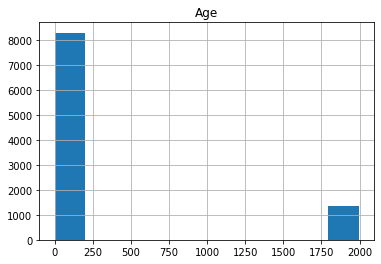

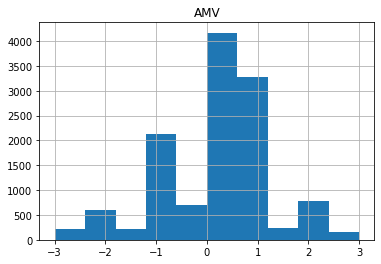

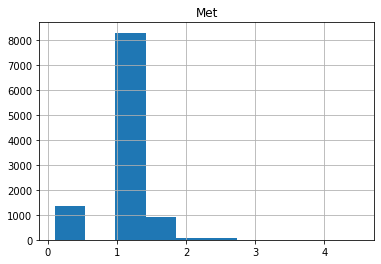

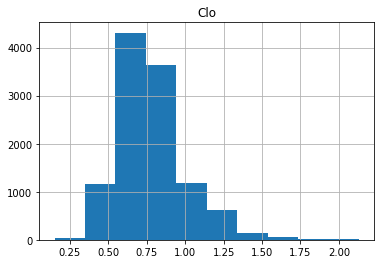

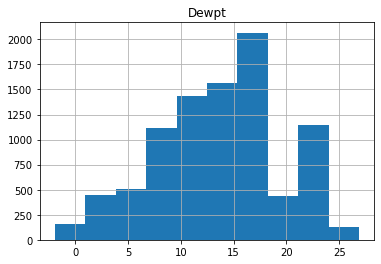

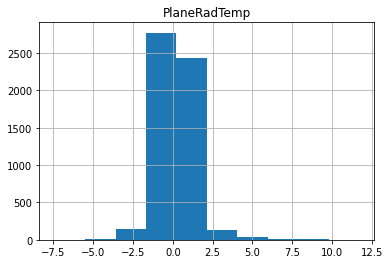

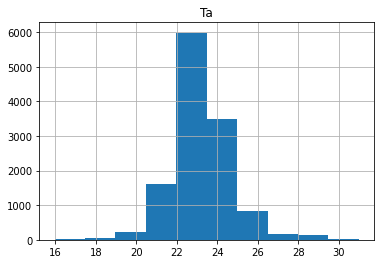

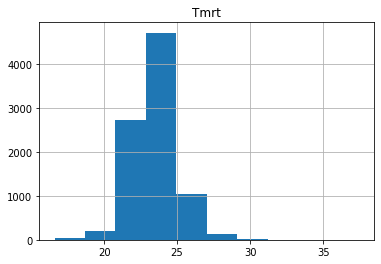

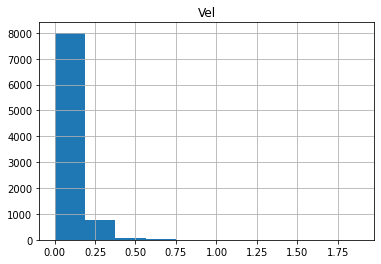

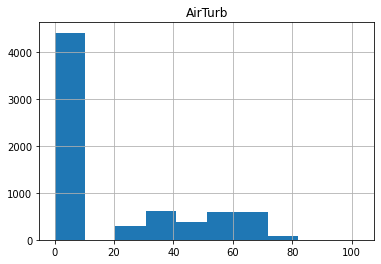

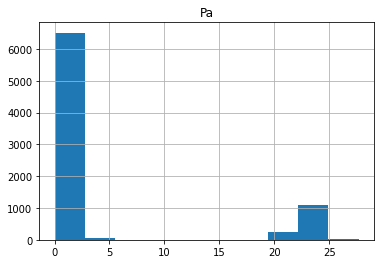

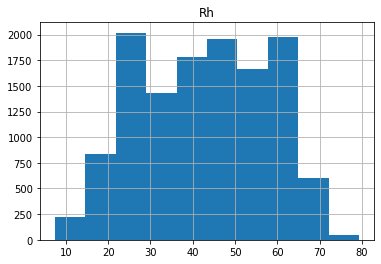

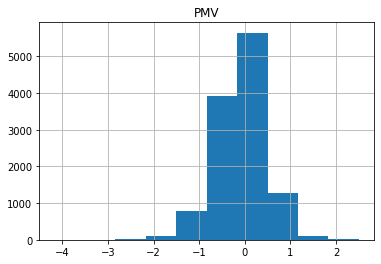

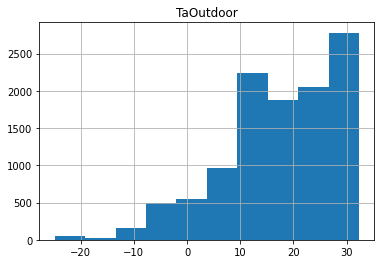

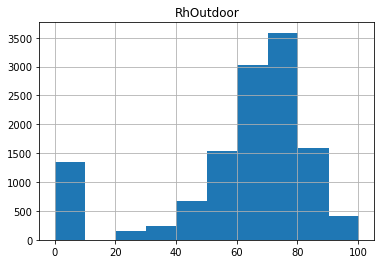

In [378]:
for i in df2:
  df2.hist(i)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


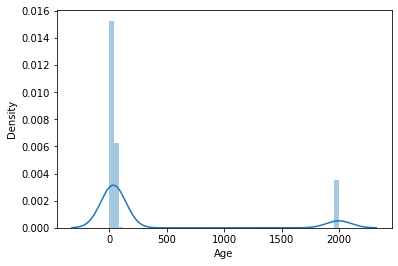

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


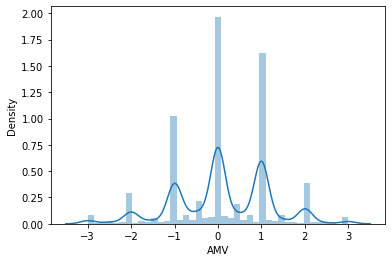

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


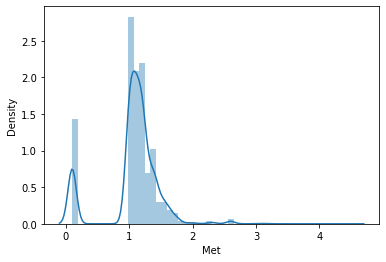

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


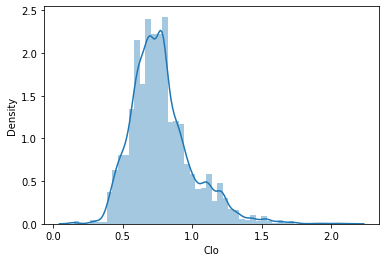

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


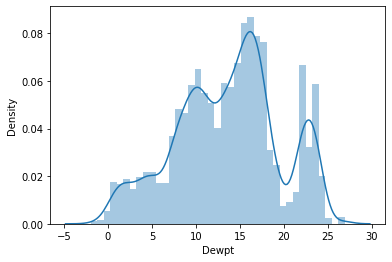

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


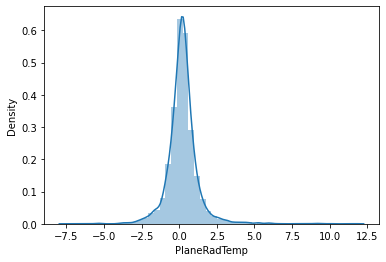

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


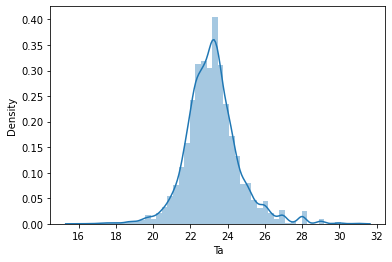

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


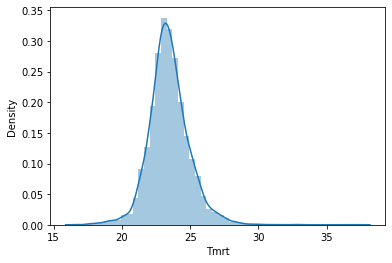

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


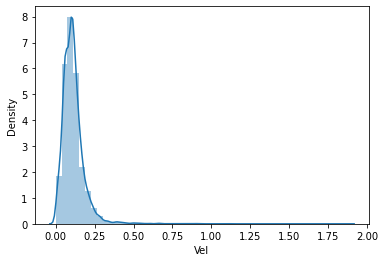

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


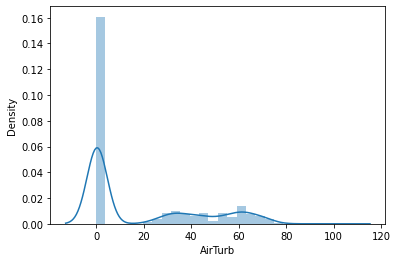

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


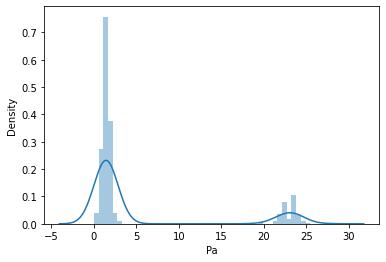

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


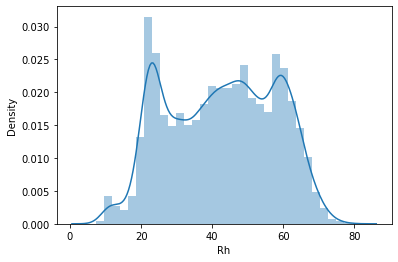

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


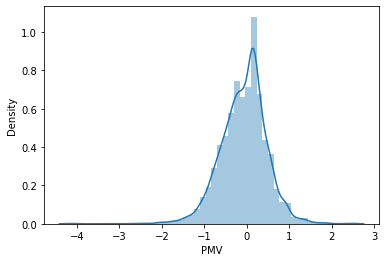

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


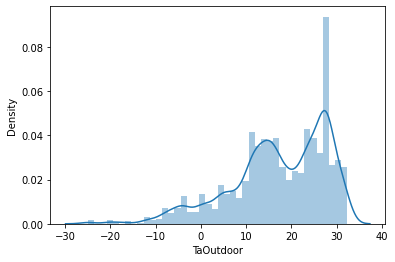

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


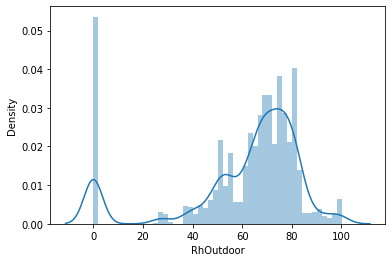

In [379]:
for i in df2:
  sns.distplot(a=df2[i])
  plt.show()

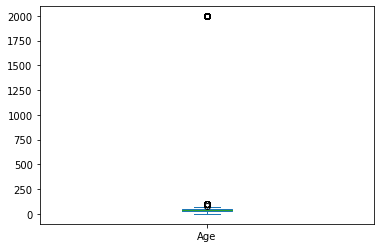

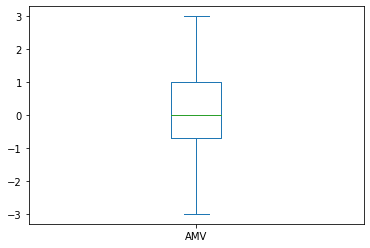

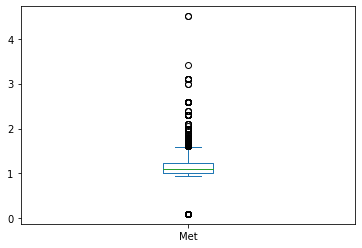

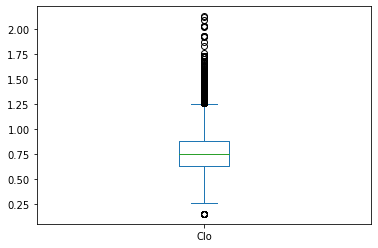

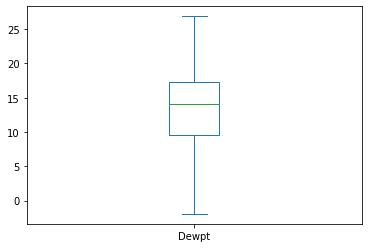

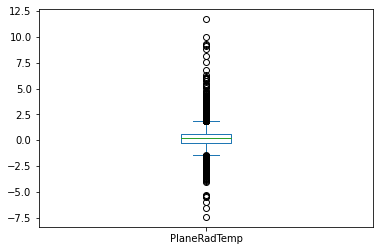

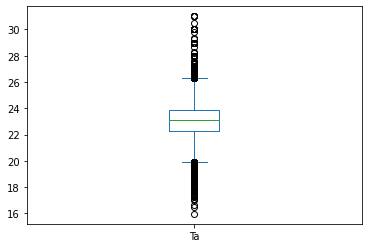

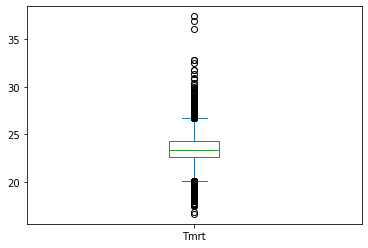

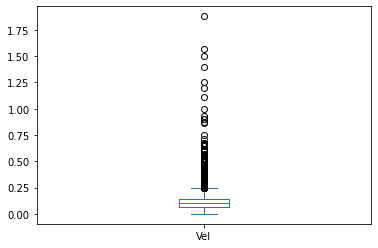

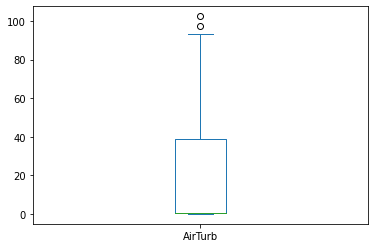

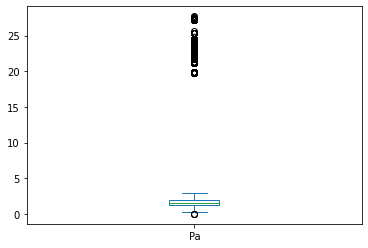

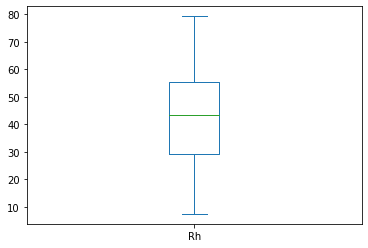

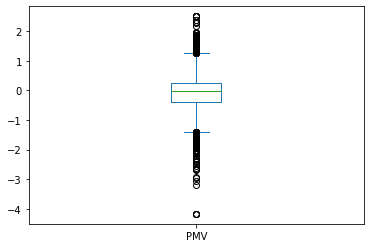

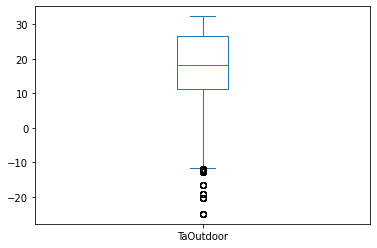

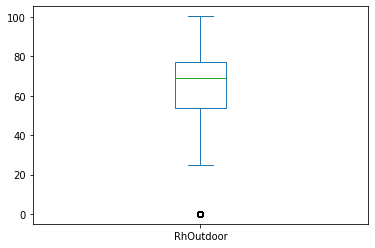

In [380]:
for i in df2:     
    df2[i].plot(kind='box')
    plt.show()

# **Q3**

In [381]:
df2['Age'] = df2['Age'].fillna(df2['Age'].median())
print(df2['Age'])

0          35.0
1          35.0
2          35.0
3          35.0
4          35.0
          ...  
12561    1996.0
12562    1996.0
12563    1996.0
12564    1996.0
12565    1996.0
Name: Age, Length: 12566, dtype: float64


In [382]:
df2['AMV'] = df2['AMV'].fillna(df2['AMV'].mean())
print(df2['AMV'])

0        2.0
1        2.0
2        1.0
3        3.0
4        3.0
        ... 
12561    1.0
12562    1.0
12563    1.0
12564    1.0
12565    1.0
Name: AMV, Length: 12566, dtype: float64


In [383]:
df2['Met'] = df2['Met'].fillna(df2['Met'].mean())
print(df2['Met'])

0        2.1
1        2.1
2        2.1
3        2.6
4        3.0
        ... 
12561    0.1
12562    0.1
12563    0.1
12564    0.1
12565    0.1
Name: Met, Length: 12566, dtype: float64


In [384]:
df2['Clo'] = df2['Clo'].fillna(df2['Clo'].mean())
print(df2['Clo'])

0        0.650000
1        0.780000
2        1.050000
3        0.400000
4        0.370000
           ...   
12561    0.778492
12562    0.778492
12563    0.778492
12564    0.778492
12565    0.778492
Name: Clo, Length: 12566, dtype: float64


In [385]:
df2['Dewpt'] = df2['Dewpt'].fillna(df2['Dewpt'].mean())
print(df2['Dewpt'])

0        13.621447
1        13.621447
2        13.621447
3        13.621447
4        13.621447
           ...    
12561    22.122000
12562    22.122000
12563    22.122000
12564    22.122000
12565    22.122000
Name: Dewpt, Length: 12566, dtype: float64


In [386]:
df2.drop(['PlaneRadTemp', 'AirTurb' , 'Pa'], axis = 1, inplace = True)
print(df2.columns)

Index(['Age', 'AMV', 'Met', 'Clo', 'Dewpt', 'Ta', 'Tmrt', 'Vel', 'Rh', 'PMV',
       'TaOutdoor', 'RhOutdoor'],
      dtype='object')


In [387]:
df2['Ta'] = df2['Ta'].fillna(df2['Ta'].mean())
print(df2['Ta'])

0        19.100000
1        19.100000
2        20.000000
3        21.000000
4        23.000000
           ...    
12561    22.142437
12562    22.142437
12563    22.142437
12564    22.142437
12565    22.142437
Name: Ta, Length: 12566, dtype: float64


In [388]:
df2['Tmrt'] = df2['Tmrt'].fillna(df2['Tmrt'].mean())
print(df2['Tmrt'])

0        19.629472
1        19.629472
2        19.046655
3        20.153116
4        21.942458
           ...    
12561    23.450261
12562    23.450261
12563    23.450261
12564    23.450261
12565    23.450261
Name: Tmrt, Length: 12566, dtype: float64


In [389]:
df2['Vel'] = df2['Vel'].fillna(df2['Vel'].mean())
print(df2['Vel'])

0        0.060000
1        0.060000
2        0.060000
3        0.060000
4        0.060000
           ...   
12561    0.112439
12562    0.112439
12563    0.112439
12564    0.112439
12565    0.112439
Name: Vel, Length: 12566, dtype: float64


In [390]:
df2['Rh'] = df2['Rh'].fillna(df2['Rh'].mean())
print(df2['Rh'])

0        51.25
1        51.30
2        51.90
3        49.90
4        45.60
         ...  
12561    22.90
12562    21.40
12563    23.10
12564    22.00
12565    20.30
Name: Rh, Length: 12566, dtype: float64


In [391]:
df2['PMV'] = df2['PMV'].fillna(df2['PMV'].mean())
print(df2['PMV'])

0        0.340000
1        0.510000
2        0.800000
3        0.760000
4        1.470000
           ...   
12561   -0.073676
12562   -0.073676
12563   -0.073676
12564   -0.073676
12565   -0.073676
Name: PMV, Length: 12566, dtype: float64


In [392]:
df2['TaOutdoor'] = df2['TaOutdoor'].fillna(df2['TaOutdoor'].mean())
print(df2['TaOutdoor'])

0        11.550000
1        11.550000
2        11.550000
3        11.550000
4        11.550000
           ...    
12561    17.174585
12562    17.174585
12563    17.174585
12564    17.174585
12565    17.174585
Name: TaOutdoor, Length: 12566, dtype: float64


In [393]:
df2['RhOutdoor'] = df2['RhOutdoor'].fillna(df2['RhOutdoor'].mean())
print(df2['RhOutdoor'])

0        79.0
1        79.0
2        79.0
3        79.0
4        79.0
         ... 
12561     0.0
12562     0.0
12563     0.0
12564     0.0
12565     0.0
Name: RhOutdoor, Length: 12566, dtype: float64


In [394]:
print(df2.columns)

Index(['Age', 'AMV', 'Met', 'Clo', 'Dewpt', 'Ta', 'Tmrt', 'Vel', 'Rh', 'PMV',
       'TaOutdoor', 'RhOutdoor'],
      dtype='object')


# **Q4**

0        35.0
1        35.0
2        35.0
3        35.0
4        35.0
         ... 
12561    35.0
12562    35.0
12563    35.0
12564    35.0
12565    35.0
Name: Age, Length: 12566, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


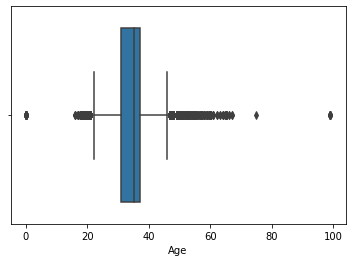

In [395]:
median = df2.loc[df2['Age']<100, 'Age'].median()
df2["Age"] = df2["Age"].mask(df2["Age"] >100, median)
print(df2["Age"])
sns.boxplot(df2['Age'])

0        35.0
1        35.0
2        35.0
3        35.0
4        35.0
         ... 
12561    35.0
12562    35.0
12563    35.0
12564    35.0
12565    35.0
Name: Age, Length: 12566, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


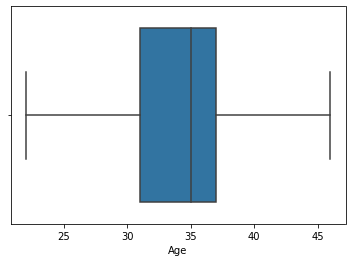

0        2.0
1        2.0
2        1.0
3        3.0
4        3.0
        ... 
12561    1.0
12562    1.0
12563    1.0
12564    1.0
12565    1.0
Name: AMV, Length: 12566, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


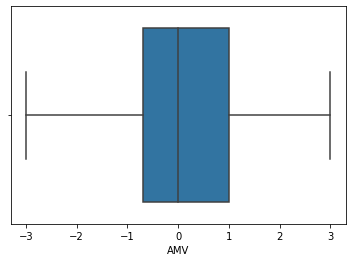

0        1.5
1        1.5
2        1.5
3        1.5
4        1.5
        ... 
12561    0.7
12562    0.7
12563    0.7
12564    0.7
12565    0.7
Name: Met, Length: 12566, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


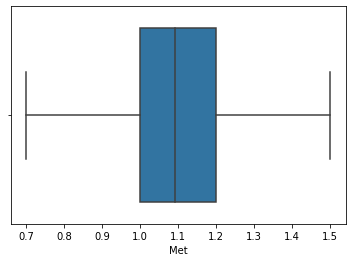

0        0.650000
1        0.780000
2        1.050000
3        0.400000
4        0.370000
           ...   
12561    0.778492
12562    0.778492
12563    0.778492
12564    0.778492
12565    0.778492
Name: Clo, Length: 12566, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


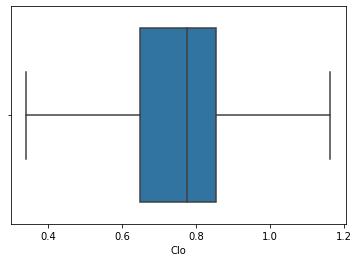

0        13.621447
1        13.621447
2        13.621447
3        13.621447
4        13.621447
           ...    
12561    22.122000
12562    22.122000
12563    22.122000
12564    22.122000
12565    22.122000
Name: Dewpt, Length: 12566, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


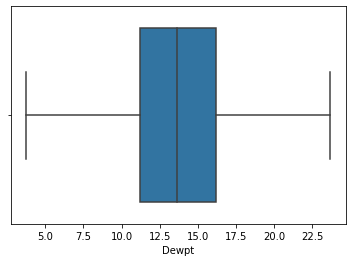

0        19.900000
1        19.900000
2        20.000000
3        21.000000
4        23.000000
           ...    
12561    22.142437
12562    22.142437
12563    22.142437
12564    22.142437
12565    22.142437
Name: Ta, Length: 12566, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


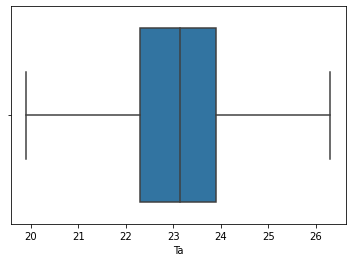

0        21.548174
1        21.548174
2        21.548174
3        21.548174
4        21.942458
           ...    
12561    23.450261
12562    23.450261
12563    23.450261
12564    23.450261
12565    23.450261
Name: Tmrt, Length: 12566, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


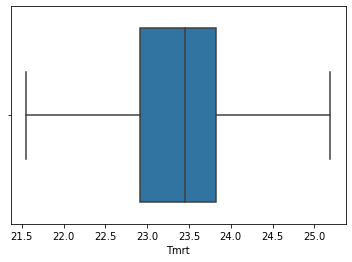

0        0.060000
1        0.060000
2        0.060000
3        0.060000
4        0.060000
           ...   
12561    0.112439
12562    0.112439
12563    0.112439
12564    0.112439
12565    0.112439
Name: Vel, Length: 12566, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


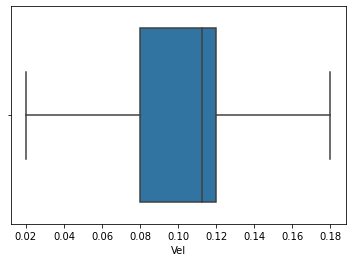

0        51.25
1        51.30
2        51.90
3        49.90
4        45.60
         ...  
12561    22.90
12562    21.40
12563    23.10
12564    22.00
12565    20.30
Name: Rh, Length: 12566, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


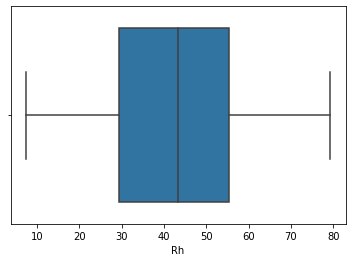

0        0.340000
1        0.510000
2        0.800000
3        0.760000
4        1.155000
           ...   
12561   -0.073676
12562   -0.073676
12563   -0.073676
12564   -0.073676
12565   -0.073676
Name: PMV, Length: 12566, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


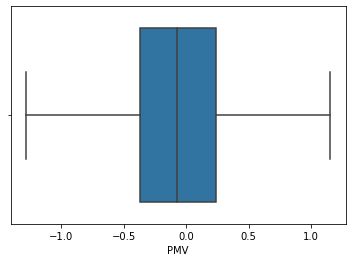

0        11.550000
1        11.550000
2        11.550000
3        11.550000
4        11.550000
           ...    
12561    17.174585
12562    17.174585
12563    17.174585
12564    17.174585
12565    17.174585
Name: TaOutdoor, Length: 12566, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


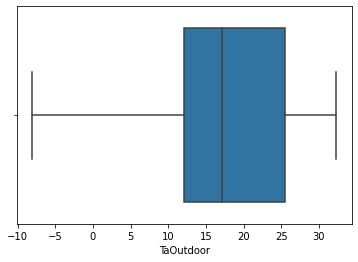

0        79.000000
1        79.000000
2        79.000000
3        79.000000
4        79.000000
           ...    
12561    18.999842
12562    18.999842
12563    18.999842
12564    18.999842
12565    18.999842
Name: RhOutdoor, Length: 12566, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


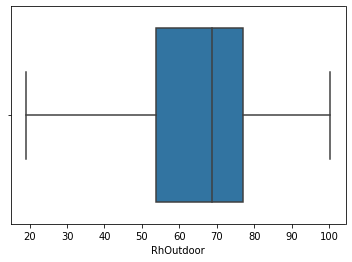

In [396]:
import numpy as np
for i in df2:
  Q1 = df2[i].quantile(0.25)
  Q3 = df2[i].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 - (whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  df2[i]=np.where(df2[i]>upper_whisker,upper_whisker,np.where(df2[i]<lower_whisker,lower_whisker,df2[i]))
  print(df2[i])
  sns.boxplot(df2[i])
  plt.show()

In [397]:
print(df2)

        Age  AMV  Met       Clo      Dewpt         Ta       Tmrt       Vel  \
0      35.0  2.0  1.5  0.650000  13.621447  19.900000  21.548174  0.060000   
1      35.0  2.0  1.5  0.780000  13.621447  19.900000  21.548174  0.060000   
2      35.0  1.0  1.5  1.050000  13.621447  20.000000  21.548174  0.060000   
3      35.0  3.0  1.5  0.400000  13.621447  21.000000  21.548174  0.060000   
4      35.0  3.0  1.5  0.370000  13.621447  23.000000  21.942458  0.060000   
...     ...  ...  ...       ...        ...        ...        ...       ...   
12561  35.0  1.0  0.7  0.778492  22.122000  22.142437  23.450261  0.112439   
12562  35.0  1.0  0.7  0.778492  22.122000  22.142437  23.450261  0.112439   
12563  35.0  1.0  0.7  0.778492  22.122000  22.142437  23.450261  0.112439   
12564  35.0  1.0  0.7  0.778492  22.122000  22.142437  23.450261  0.112439   
12565  35.0  1.0  0.7  0.778492  22.122000  22.142437  23.450261  0.112439   

          Rh       PMV  TaOutdoor  RhOutdoor  
0      51.25  0.

In [398]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

for column_name in df2: 
  outliers = find_outliers_IQR(df2[column_name])
  print("Outliers: ",column_name," " + str(len(outliers)))

Outliers:  Age  0
Outliers:  AMV  0
Outliers:  Met  0
Outliers:  Clo  0
Outliers:  Dewpt  0
Outliers:  Ta  0
Outliers:  Tmrt  0
Outliers:  Vel  0
Outliers:  Rh  0
Outliers:  PMV  0
Outliers:  TaOutdoor  0
Outliers:  RhOutdoor  0


In [399]:
print(df2.isna().sum())

Age          0
AMV          0
Met          0
Clo          0
Dewpt        0
Ta           0
Tmrt         0
Vel          0
Rh           0
PMV          0
TaOutdoor    0
RhOutdoor    0
dtype: int64


# **Q5**

In [400]:
print(df2.var())

Age           46.584339
AMV            1.209305
Met            0.041571
Clo            0.033370
Dewpt         22.698750
Ta             1.667084
Tmrt           0.873679
Vel            0.001498
Rh           226.204128
PMV            0.239404
TaOutdoor     94.824547
RhOutdoor    394.684046
dtype: float64


In [401]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(df2)

array([[ 3.50000000e+01,  2.00000000e+00,  1.50000000e+00, ...,
         3.40000000e-01,  1.15500000e+01,  7.90000000e+01],
       [ 3.50000000e+01,  2.00000000e+00,  1.50000000e+00, ...,
         5.10000000e-01,  1.15500000e+01,  7.90000000e+01],
       [ 3.50000000e+01,  1.00000000e+00,  1.50000000e+00, ...,
         8.00000000e-01,  1.15500000e+01,  7.90000000e+01],
       ...,
       [ 3.50000000e+01,  1.00000000e+00,  7.00000000e-01, ...,
        -7.36756529e-02,  1.71745847e+01,  1.89998419e+01],
       [ 3.50000000e+01,  1.00000000e+00,  7.00000000e-01, ...,
        -7.36756529e-02,  1.71745847e+01,  1.89998419e+01],
       [ 3.50000000e+01,  1.00000000e+00,  7.00000000e-01, ...,
        -7.36756529e-02,  1.71745847e+01,  1.89998419e+01]])

# **Q6A**

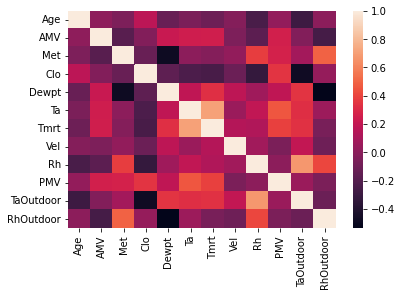

In [402]:
dataplot=sns.heatmap(df2.corr())
plt.show()

In [403]:
print(df2.corr())

                Age       AMV       Met       Clo     Dewpt        Ta  \
Age        1.000000  0.015335 -0.045354  0.172838 -0.123948 -0.053250   
AMV        0.015335  1.000000 -0.186941 -0.025969  0.221648  0.245825   
Met       -0.045354 -0.186941  1.000000 -0.125545 -0.478985  0.008653   
Clo        0.172838 -0.025969 -0.125545  1.000000 -0.161412 -0.228199   
Dewpt     -0.123948  0.221648 -0.478985 -0.161412  1.000000  0.185950   
Ta        -0.053250  0.245825  0.008653 -0.228199  0.185950  1.000000   
Tmrt      -0.103697  0.254437 -0.021137 -0.245260  0.330317  0.709615   
Vel       -0.022680 -0.049671  0.026154 -0.113099  0.180739  0.058164   
Rh        -0.238918 -0.169134  0.376326 -0.322418  0.075172  0.193914   
PMV        0.032745  0.258599  0.269493  0.348673  0.187332  0.458608   
TaOutdoor -0.286001 -0.028385  0.087670 -0.473177  0.348134  0.325787   
RhOutdoor  0.008936 -0.256032  0.495665  0.037017 -0.535550  0.060385   

               Tmrt       Vel        Rh       PMV 

# **Q7**

In [404]:
from scipy.stats import entropy
def calculate_entropy(df2):
    prob = df2.value_counts(normalize = True)
    entropy = -1 * np.sum(np.log2(prob) * prob)
    return round(entropy, 3)
for i in df2:
  print('Entropy: ', i, ' {}'.format(calculate_entropy(df2[i])))

Entropy:  Age  3.421
Entropy:  AMV  3.507
Entropy:  Met  4.836
Entropy:  Clo  7.101
Entropy:  Dewpt  7.451
Entropy:  Ta  8.095
Entropy:  Tmrt  7.119
Entropy:  Vel  4.98
Entropy:  Rh  10.879
Entropy:  PMV  7.409
Entropy:  TaOutdoor  7.579
Entropy:  RhOutdoor  7.204


In [405]:
def calculate_IG(df2, target, feature):
    target_entropy = calculate_entropy(df2[target])
    entropy_list = []
    weight_list = []
    for i in df2[feature].unique():
        feature_level = df2[df2[feature] == i]
        entropy_level = calculate_entropy(feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(feature_level) / len(df2)
        weight_list.append(round(weight_level, 3))
    remaining_entropy = np.sum(np.array(entropy_list) * np.array(weight_list))
    information_gain = target_entropy - remaining_entropy
    return information_gain

In [406]:
df2['AMV'] = df2['AMV'].astype(int)
for i in df2.drop(columns = 'AMV').columns:
    info_gain = calculate_IG(df2, 'AMV', i)
    print(i)
    print(round(info_gain, 3))

Age
0.068
Met
0.299
Clo
0.359
Dewpt
0.738
Ta
0.577
Tmrt
0.552
Vel
0.255
Rh
1.186
PMV
0.259
TaOutdoor
0.418
RhOutdoor
0.389


# Part **B**

# **Q1**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Features = ['Age','Clo','Met','Dewpt','Ta','Tmrt','Vel','Rh','TaOutdoor','RhOutdoor']
X = df2.loc[:, Features]
Response_variable = ['AMV' ,'PMV']
Y= df2.loc[:, Response_variable]
num=int(len(df2)*0.8)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=num)
normalized_data = preprocessing.normalize(df2)
print(normalized_data)

# **Q2A**

In [227]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

p_x = df2[['Age','Clo','Met','Dewpt','Ta','Tmrt','Vel','Rh','TaOutdoor','RhOutdoor']]
p_y = df2['PMV']

In [228]:
f_s = sfs(LinearRegression(), n_features_to_select = 5, direction = 'forward')
f_s.fit(p_x, p_y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [229]:
f_s.get_support()

array([ True,  True, False,  True,  True,  True, False, False, False,
       False])

In [230]:
X_train_pfs = X_train[['Age', 'Clo', 'Dewpt', 'Ta', 'Tmrt']]
y_train_pfs = y_train['PMV']
X_test_pfs = X_test[['Age', 'Clo', 'Dewpt', 'Ta', 'Tmrt']]
y_test_pfs = y_test[['PMV']]
lreg_ = LinearRegression()
lreg_.fit(X_train_pfs, y_train_pfs)
y_pred = lreg_.predict(X_test_pfs)
lreg_.score(X_test_pfs, y_pred)

1.0

# **Q2B**

In [231]:
b_s = sfs(LinearRegression(), n_features_to_select = 5, direction = 'backward')
b_s.fit(p_x, p_y)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=5)

In [232]:
b_s.get_support()

array([ True,  True, False,  True,  True,  True, False, False, False,
       False])

In [233]:
X_train_pfs = X_train[['Age', 'Clo', 'Dewpt', 'Ta', 'Tmrt']]
y_train_pfs = y_train['PMV']
X_test_pfs = X_test[['Age', 'Clo', 'Dewpt', 'Ta', 'Tmrt']]
y_test_pfs = y_test[['PMV']]
lreg_ = LinearRegression()
lreg_.fit(X_train_pfs, y_train_pfs)
y_pred = lreg_.predict(X_test_pfs)
lreg_.score(X_test_pfs, y_pred)

1.0

# **Q3A**

In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
a_x = df2[['Age','Clo','Met','Dewpt','Ta','Tmrt','Vel','Rh','TaOutdoor','RhOutdoor']]
a_y = df2['AMV']
f_s = sfs(LogisticRegression(), n_features_to_select = 5, direction = 'forward')

In [ ]:
f_s.fit(a_x, a_y)

In [236]:
f_s.get_support()

array([ True,  True,  True, False, False,  True,  True, False, False,
       False])

In [240]:
X_train_afs = X_train[['Age', 'Clo', 'Met', 'Tmrt', 'Vel']]
y_train_afs = y_train['AMV']
X_test_afs = X_test[['Age', 'Clo', 'Met', 'Tmrt', 'Vel']]
y_test_afs = y_test[['AMV']]
logreg_ = LogisticRegression()

In [ ]:
logreg_.fit(X_train_afs, y_train_afs)
y_pred = logreg_.predict(X_test_afs)
accuracy_score(y_test_afs, y_pred)

# **Q3B**

In [ ]:
f_s = sfs(LogisticRegression(), n_features_to_select = 5, direction = 'backward')
f_s.fit(a_x, a_y)

In [245]:
f_s.get_support()

array([False,  True,  True, False,  True,  True,  True, False, False,
       False])

In [247]:
X_train_abs = X_train[['Clo', 'Met', 'Ta', 'Tmrt', 'Vel']]
y_train_abs = y_train['AMV']
X_test_abs = X_test[['Clo', 'Met', 'Ta', 'Tmrt', 'Vel']]
y_test_abs = y_test[['AMV']]
logreg_ = LogisticRegression()

In [ ]:
logreg_.fit(X_train_abs, y_train_abs)
y_pred = logreg_.predict(X_test_abs)
accuracy_score(y_test_abs, y_pred)

# **Q4**

In [257]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
kf = KFold(n_splits = 3, shuffle = True, random_state = 101)
cross_val_score(lreg_, X_train_pfs, y_train_pfs)

array([0.48644885, 0.44547353, 0.45150303, 0.46566876, 0.48301733])

In [ ]:
kf = KFold(n_splits = 3, shuffle = True, random_state = 101)
cross_val_score(logreg_, X_train_abs, y_train_abs)

In [358]:
confusion_matrix(y_test_abs, y_pred)

array([[   0,    0,    0,   19,    1,    0,    0],
       [   0,    0,    0,  121,    5,    0,    0],
       [   0,    0,    0,  439,   10,    0,    0],
       [   0,    0,    0, 1051,   27,    0,    0],
       [   0,    0,    0,  370,  291,    0,    0],
       [   0,    0,    0,  134,   25,    0,    0],
       [   0,    0,    0,   19,    2,    0,    0]])